# Fehlerrechnung (in Theorie) und Praxis 
Dieses Jupyter notebook hat das Ziel beizubringen wie man "Fehler" bzw. besser !Unsicherheiten! in Messdaten im Praktikum und Wissenschaft angemessen behandelt. Da wird am Beispiel der Bestimmung von g mit einem fallenden Gegenstandes erläutert. Außerdem zeigt es exemplarisch wie eine Datenauswertung im AP aussehen kann und kann später als Vorlage für die eigenen Auswertung dienen.

In [9]:
#Hier könnte dein Kommentar stehen
#Laden von Packages


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

In [10]:
#Laden von euren Messdaten in die Variable data
N_gruppen=3
#datagruppen=np.zeros((100,N_gruppen))

#for i in range(N_gruppen):
#    datagen=np.genfromtxt('Gruppe'+str(i)+'/zeiten.txt',skip_header=1)
#    datagruppen[:len(datagen),i]=datagen
#data=np.setdiff1d(datagruppen.flatten(),0)
#data = np.delete(datagruppen.flatten(), np.where(datagruppen.flatten() == 0))
#print(data)

#Die Daten müssen mit der folgenden Zeile nicht aus den zeiten.txt Dateien der Einführungsstunde importiert werden
data=np.array([0.53, 0.67, 0.47, 0.9,  0.55, 0.6,  0.88, 0.54, 0.72 ,0.92 ,0.54 ,0.6  ,0.51 ,0.53,
 0.44 ,0.57 ,0.54, 0.4 , 1.02 ,0.54 ,0.63 ,0.7  ,0.54 ,0.59 ,0.83 ,0.6  ,0.75 ,0.85,
 0.41 ,0.67 ,0.56 ,0.79 ,0.5  ,0.67, 0.63 ,0.67 ,0.41 ,0.6  ,0.56 ,0.6  ,0.67 ,0.6
, 0.4  ,0.47 ,0.6 , 0.6 , 0.6 ])

In [11]:
print('Ihr habt '+str(len(data))+' Datenpunkte gesammelt.')

Ihr habt 47 Datenpunkte gesammelt.


<IPython.core.display.Javascript object>


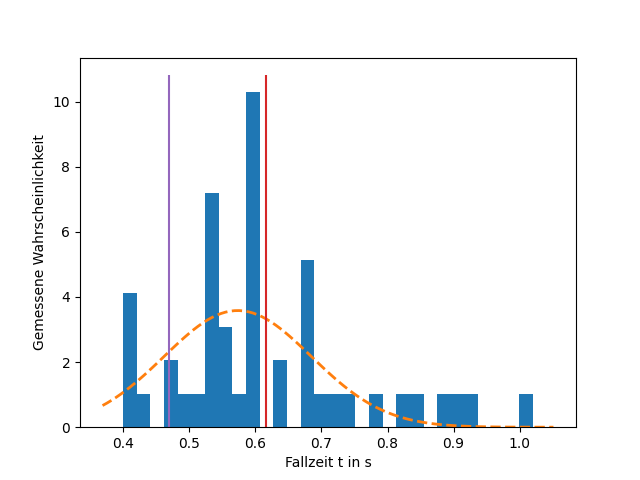

In [17]:

# Dieser Codeblock wurde zu 80% mit ChatGPT erstellt, aber halt nur zu 80%
# ChatGPT prompt :I have data I a 1D dumpy array and want to plot it in a 
#histogram along with a gaussian fit curve. Can you help me programming.

# Plot Histogram
%matplotlib notebook
bins=30
hist, bins, patches=plt.hist(data, bins=bins, density=True)
#print(hist,bins)

# Initial Fit Gaussian Curve
mu=np.mean(data)
sigma= np.std(data)
#print(sigma)

# Gaussian function
def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))

# Fit the data to the gaussian function
popt, pcov = curve_fit(gaussian, bins[:-1]+(bins[1]-bins[0])/2, hist, p0=[mu, sigma])

# Plot Gaussian Fit Curve
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, gaussian(x, *popt), '--', color='C1',linewidth=2,label='')

# Plot Vertical Line
plt.vlines(mu,ymin, ymax,color='C3')

# Add labels and title
plt.xlabel('Fallzeit t in s')
plt.ylabel('Gemessene Wahrscheinlichkeit')

#Plotten des theoretischen Wertes für die Fallzeit s=1/2gt^2 ----> t=np.sqrt((2*s)/g) quadratwurzel von...

t_theorie=0.47 #np.sqrt((2*2)/10) #Hier könnte deine Berechnung stehen
plt.vlines(t_theorie,ymin, ymax,color='C4', label='theoretischer Wert')
plt.titel('Anmerkung zum Plot unter dem Plot lesen')
#print(sigma)
# Show plot
plt.show()

Anmerkung zum Plot: Ich denke erst bei genug Messdaten stimmt die Mitte der gefitteten Gaussglocke an den berechneten Mittelwert. Das liegt wahrscheinlich daran, dass zufällige Werte erst bei vieeeelen Wiederholungen eine Gaussform ausbilden. Die mathematischen Theorien die sind also nur scheinbar im Widerspruch, in Wirklichkeit sind sie noch gar nicht anwendbar weil noch nicht gültig. 


In welche zwei Typen kann man Messfehler einordnen?
- Systematisch Fehler
- Stochastisch Fehler

Eigenschaften von systematischen Fehlern: 

"Denkfehler", Effekte nicht einbezogen "Luftwiderstand nicht btrachtet"
verscheiben das Ergebnis


Eigenschaften von stochastischen Fehlern:

Bei selber Messung verschiebene Ergebnisse, die zufällig verteilt um einen zentralen Wert liegen.
Streunung / Unischerhiet im Ergebnis

































### (?Muster-?)Beispiel von Fehlerhandhabung in der Physik

<img src="./Elektronenmasse.jpeg" alt="Bild1" title="Historische Messwerte für die Elektronenmasse in Einheiten $10^{-31}$ kg. Dargestellt sind die relativen Abweichungen $\Delta m/m$ vom heutigen Bestwert in Einheiten von $10^{-6}$." />

Historische Messwerte für die Elektronenmasse in Einheiten $10^{-31}$ kg. Dargestellt sind die relativen Abweichungen $\Delta m/m$ vom heutigen Bestwert in Einheiten von $10^{-6}$.

Normalerweise hat man ja nicht den theoretischen Wert für die Messgröße direkt parat. Sondern normalerweise **schaftt** man Wissen. 
1. Deshalb überlegen wir uns jetzt noch kurz wie wir nach der Messung mit der Stoppuhr jetzt "besser" messen können. 
2. ?????Und dann machen wir eine zweite Runde.???? Das haben wir nciht gemacht aber wir haben besprochen wie wir es machen würden.


## Die Fehlerrechnung 

In [5]:
#Anzahl der Datenpunkte
N=len(data)
#Mittelwert
mu_oldschool=np.sum(data)/N
mu=np.mean(data)
print(mu_oldschool)
print(mu)
#Standardabweichung
sigma_oldschool= np.sqrt(np.sum(abs(mu-data)**2)/N)
sigma= np.std(data)
print(sigma_oldschool)
print(sigma)

0.6163829787234044
0.6163829787234044
0.1401735327540268
0.1401735327540268


Wir wissen nun den Mittelwert `mu` der Fallzeit und die Standardabweichung der Datenpunkte `sigma`. `[mu-1*sigma ,mu+1*sigma]` ist der Bereich in dem 68% der Datenpunkte liegen. 

Kleine Tabelle der Wahrscheinlichkeiten:
- 1 sigma Bereich -> 68.3 %
- 2 sigma Bereich -> 95.4 %
- 3 sigma Bereich -> 99.7 %

Wenn in einem Paralleuniversum (oder einfach eine andere Forschergruppe) alles nochmal neu gemacht wird dann erhalten wir auch mehrere Mittelwerte. Der Bereich in dem der Mittelwert (mit wahrscheinlichkeit liegt ist kleiner.

In [6]:
sigma_mittel= sigma/np.sqrt(N) # wir teilen dazudurch die Wurzel der Anzahl der Einzelmessungen
print(sigma_mittel)

0.020446411163395965


Aber auch der Mittelwert in diesem kleineren Bereich (konfidenzintervall) liegt wissen wir auch nur mit einer begrenzten Wahrscheinlichkeit wie der Tabelle zu entnehmen. Zwei Forschergruppen die Vergleichen könnten mit einer Wahrscheinlichkeit also beide daneben liegen. Daneben ist bezogen auf den wahren Wert. Heißt im  Umkehrschluss den **wahren** Wert zu finden ist unmöglich, wenn man es präzise formuliert.

Wie wirkt sich der Fehler auf unsere Messung von g aus? Wie münzt sich die bekannte Unsicherheit (`[mu-1*sigma ,mu+1*sigma]`) in der Zeit und z.B. auch Ortsmessung um zu einer Unsicherheit in $g(s,t)=\frac{2*s}{t^2}$?

Allgemeine Formel:

$$f+\Delta f= f(\bar x,\bar y)\pm \sqrt{\sigma_{xM}^2 \left(\frac{\partial f(\bar x,\bar y)}{\partial x}\right)^2+\sigma_{yM}^2 \left(\frac{\partial f(\bar x,\bar y)}{\partial y}\right)^2+....}$$

- $\sigma_{xM}$ ist die Standardabweichung des Mittelwertes also z.B. `sigma_mittel`
- $\bar x$ ist der Mittelwert also z.B. `mu`
- $\frac{f(\bar x,\bar y)}{\partial y}$ entspicht bei uns $\frac{f(\bar s,\bar t)}{\partial t}=\frac{-3*2*\bar s}{(\bar t)^3}$ Also erst ableiten dann einsetzen

Speziell wenn man keine Statistik in seinen Messungen hat was ist dann `sigma`? Schwierige Frage deswegen tendiert man dazu weg von statistischen Argumenten weg zu kommen und den Fehler besser Unsicherheit lieber zu überschätzen. 
Mathematisch nimmt man dazu eine Ungleichung (Cauchy-Schwarz Ungleichung $\sqrt{x^2+y^2}<|x|+|y|$) zur Hilfe mit deren Hilfe man zu der Größtfehlerabschätzung kommt.

Größtfehlerabschätzung:

$$f+\Delta f= f(\bar x,\bar y)\pm \left(\sigma_{xM} \left|\frac{\partial f(\bar x,\bar y)}{\partial x}\right|+\sigma_{y M} \left|\frac{\partial f(\bar x,\bar y)}{\partial y}\right|+....\right)$$

## Lineare Regression


Wie kann man bei einer Fitgerade den Größtfehler der Steigung feststellen? 
Z.B. bei Luftkissenwagen mit Lichtschrankenmessung entlang der Fahrbahn will man die Frage nach der Geschwindigkeit beantworten. Und das eben mit Unsicherheitsangabe

<IPython.core.display.Javascript object>


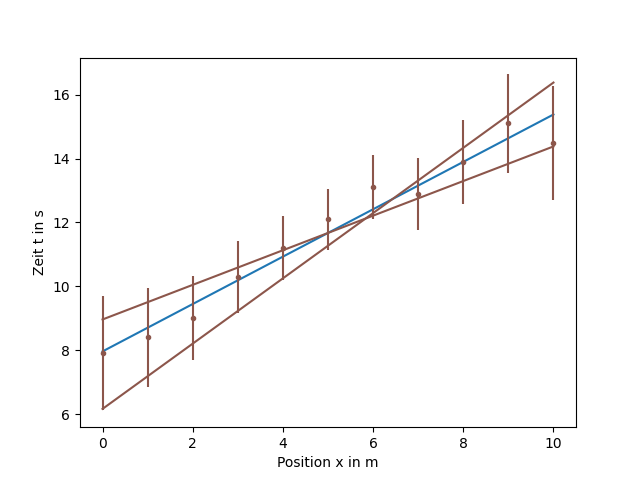

In [23]:
N = 21
x = np.linspace(0, 10, 11)
y = np.array([7.9, 8.4, 9.0, 10.3, 11.2, 12.1, 13.1,  12.9, 13.9, 15.1, 14.5])

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')

###Hier die Zahlen so lange abändern bis die Linien gerade
###noch so in allen Unsicherheitsbereichen der Datenpunkte liegt
ax.plot(x, (a-0.2 ) * x + (b+1), '-',color='tab:brown')
ax.plot(x, (a+0.28) * x + (b-1.8), '-',color='tab:brown')
# man hat die Steigung also bestimmt auf den Wert a 
#mit einer Unsicherheit angegeben durch den Unsicherheitsbereich [a-0.2,a+0.28]


# Linien zwischen Datenpunkten sind "verboten". weil man mit den Linien aussagt,
#dass man Informationen über den Verlauf zwischen den Messpunkten hat. 
#Erbsenzählerisch hat man das eigentlich nicht.
ax.errorbar(x, y,yerr=y_err, linestyle='', marker='.', color='tab:brown')


# Add labels and title
plt.xlabel('Position x in m')
plt.ylabel('Zeit t in s')


# Show plot
plt.show()